Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

In [2]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [3]:
# Preview the dataframe
dinosaurs

occurrence_no               name  ...         class             family
0            130294  Protarchaeopteryx  ...    Saurischia  Archaeopterygidae
1            130295        Caudipteryx  ...    Saurischia    Caudipterygidae
2            139242        Gorgosaurus  ...    Saurischia    Tyrannosauridae
3            139250        Gorgosaurus  ...    Saurischia    Tyrannosauridae
4            139252        Gorgosaurus  ...    Saurischia    Tyrannosauridae
...             ...                ...  ...           ...                ...
4946        1360627      Isaberrysaura  ...  Ornithischia                NaN
4947        1363632        Stegosaurus  ...  Ornithischia      Stegosauridae
4948        1363633     Othnielosaurus  ...  Ornithischia                NaN
4949        1364695          Iguanodon  ...  Ornithischia                NaN
4950        1365108         Luluichnus  ...  Ornithischia                NaN

[4951 rows x 12 columns]

## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

In [4]:
#1. How many different dinosaur names are present in the data?
unique_dinosaur_names_count = dinosaurs["name"].nunique()
print(unique_dinosaur_names_count)

1042


In [5]:
#2. Which was the largest dinosaur? What about missing data in the dataset?
# Identify the row of the largest dinosaur
largest_dinosaur_row = dinosaurs.loc[dinosaurs["length_m"].idxmax()]

# Extract the name of the largest dinosaur
largest_dinosaur_name = largest_dinosaur_row["name"]

print(largest_dinosaur_name)

Supersaurus


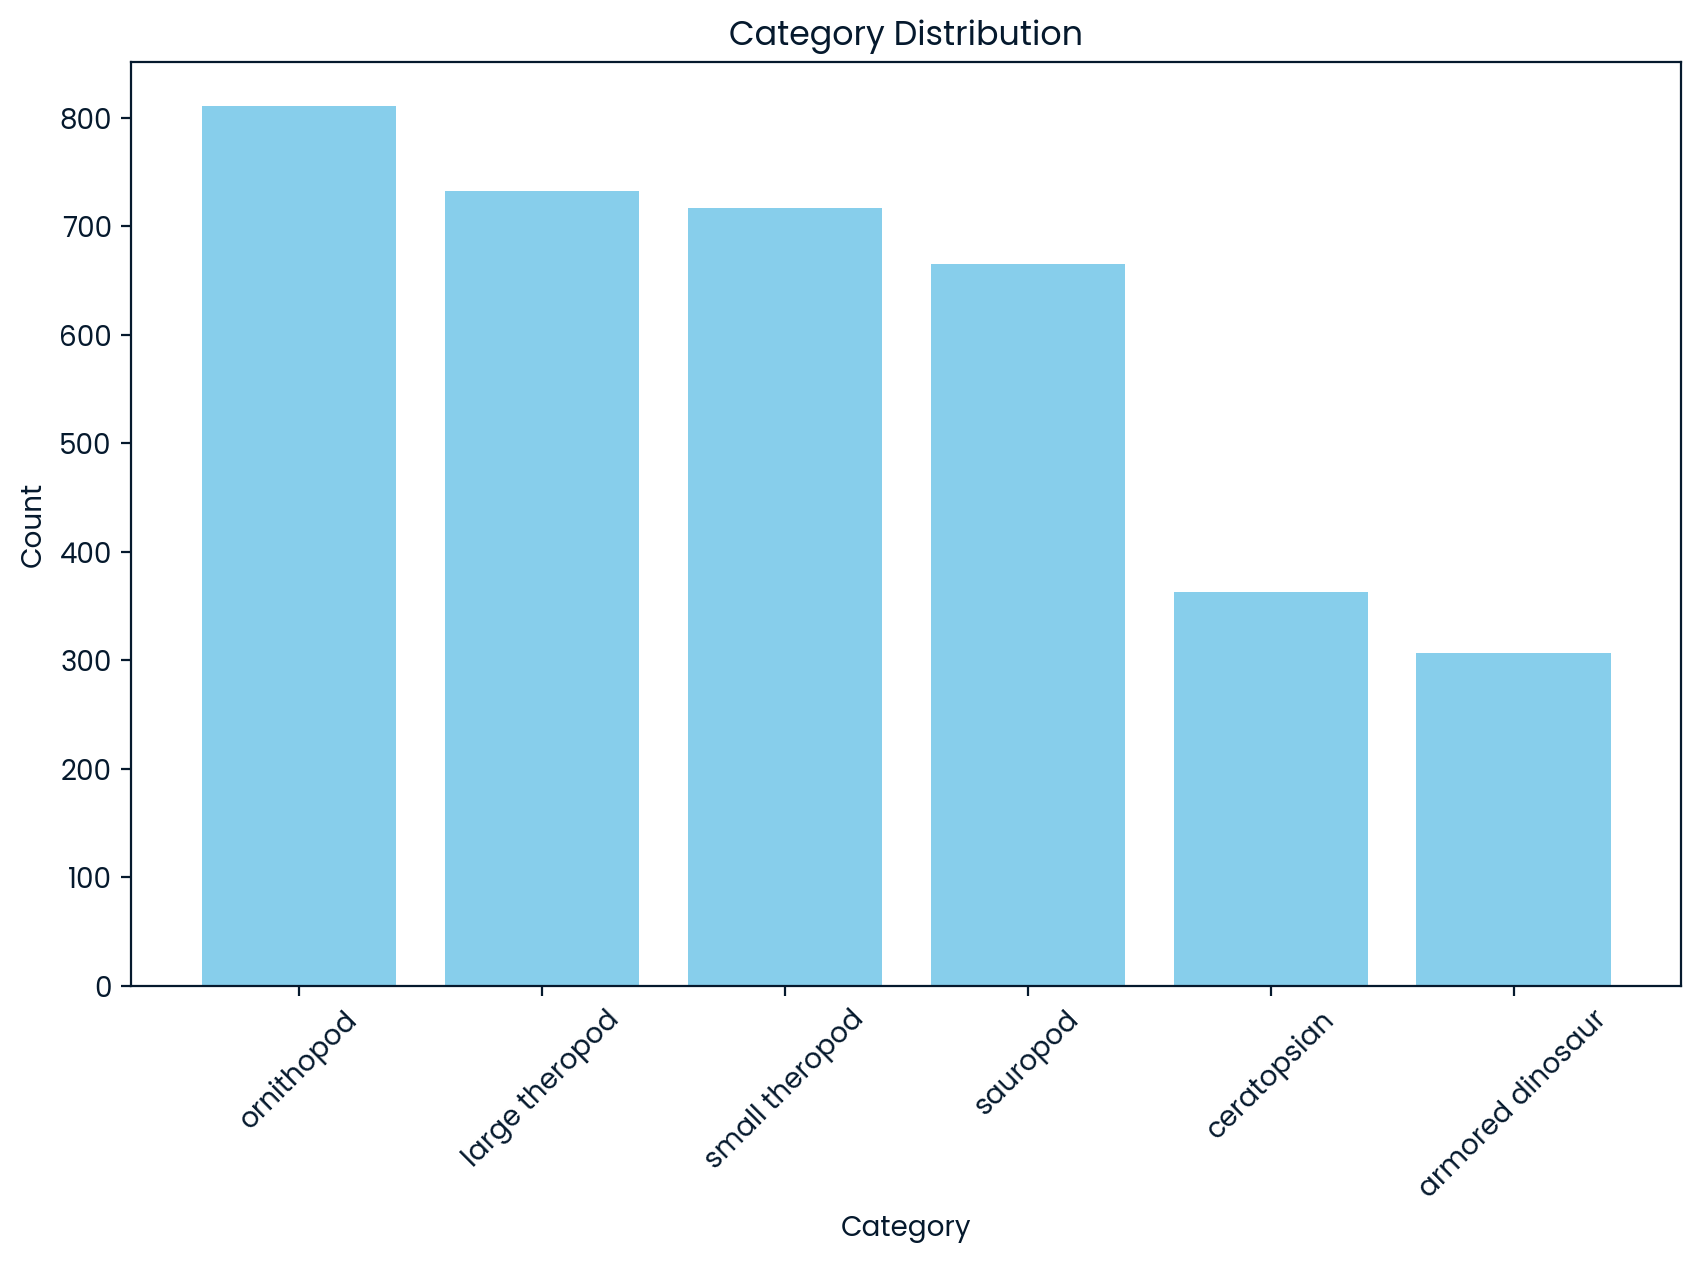

In [6]:
#3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'category_column' is the column with 5 distinct types
# Count the occurrences of each category
category_counts = dinosaurs['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
plt.bar(category_counts.index, category_counts.values, color='skyblue')  # You can customize the color

plt.xlabel('Category')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Category Distribution')  # Chart title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability, if necessary

# Show the plot
plt.show()


In [7]:
# Create a new column that averages 'max_ma' and 'min_ma'
dinosaurs['average_ma'] = (dinosaurs['max_ma'] + dinosaurs['min_ma']) / 2

# Display the updated DataFrame
print(dinosaurs)

      occurrence_no               name  ...             family average_ma
0            130294  Protarchaeopteryx  ...  Archaeopterygidae     126.23
1            130295        Caudipteryx  ...    Caudipterygidae     126.23
2            139242        Gorgosaurus  ...    Tyrannosauridae      77.05
3            139250        Gorgosaurus  ...    Tyrannosauridae      77.05
4            139252        Gorgosaurus  ...    Tyrannosauridae      77.05
...             ...                ...  ...                ...        ...
4946        1360627      Isaberrysaura  ...                NaN     170.00
4947        1363632        Stegosaurus  ...      Stegosauridae     154.70
4948        1363633     Othnielosaurus  ...                NaN     154.70
4949        1364695          Iguanodon  ...                NaN     142.40
4950        1365108         Luluichnus  ...                NaN     132.40

[4951 rows x 13 columns]


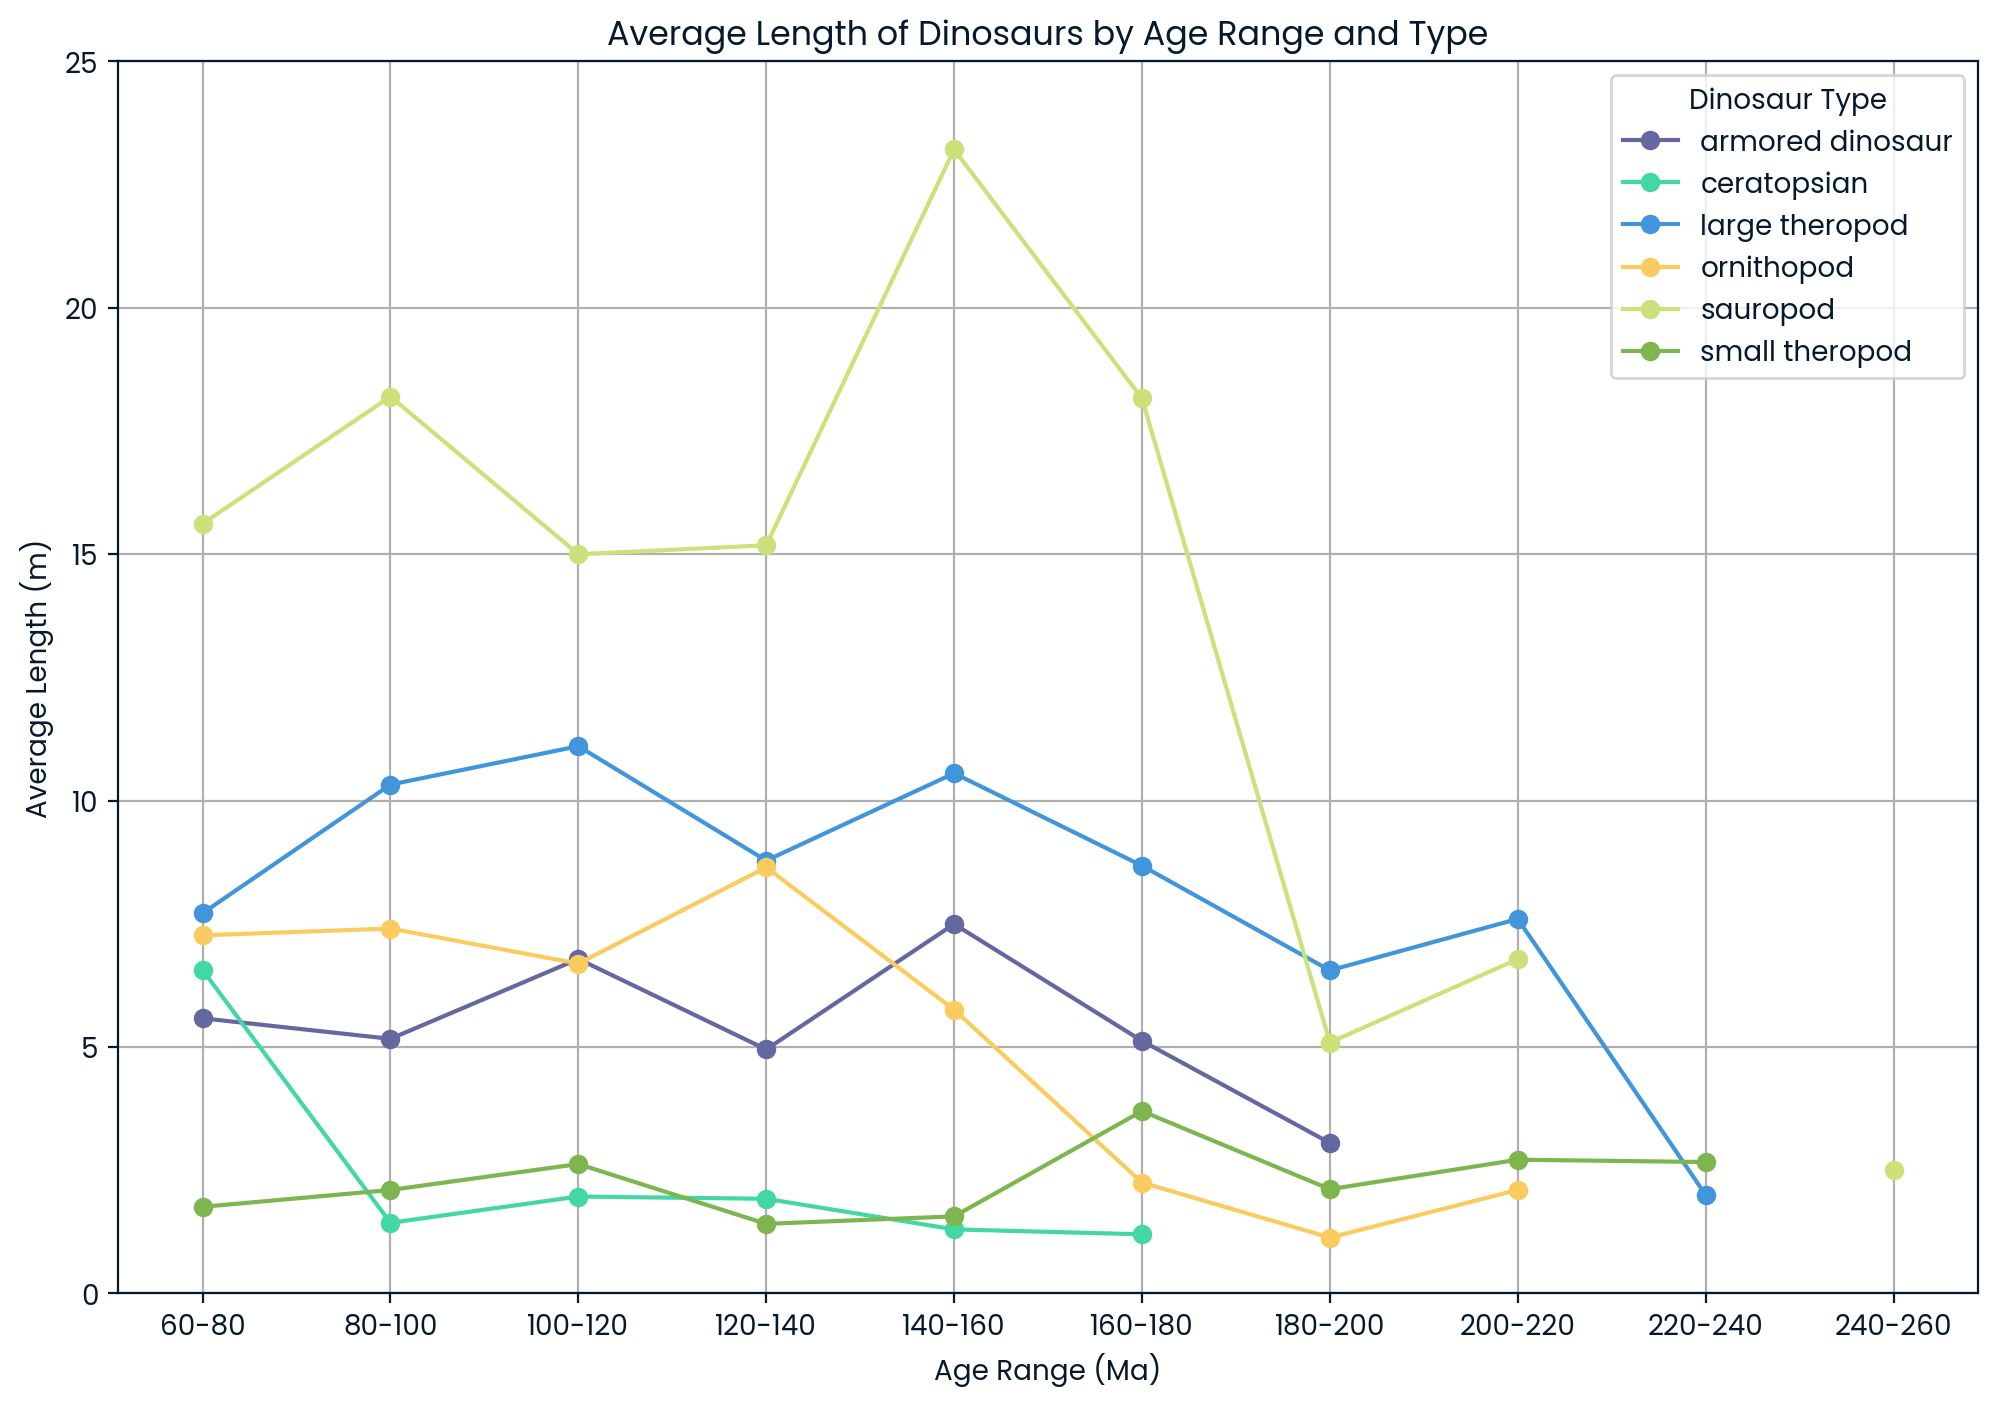

In [8]:
#4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
# Define function to categorize age ranges
def categorize_age(age):
    return (age // 20) * 20

# Categorize ages into ranges of 20 Ma
dinosaurs['age_range'] = dinosaurs['average_ma'].apply(categorize_age)

# Calculate average length by age range and type
average_length_by_age_range_type = dinosaurs.groupby(['age_range', 'type'])['length_m'].mean().unstack()

# Plot average length by age range with lines representing different types
plt.figure(figsize=(12, 8))
average_length_by_age_range_type.plot(kind='line', marker='o', ax=plt.gca())

plt.xlabel("Age Range (Ma)")
plt.ylabel("Average Length (m)")
plt.title("Average Length of Dinosaurs by Age Range and Type")

# Setting y-axis limits and intervals
plt.ylim(0, 25)
plt.yticks(range(0, 26, 5))
plt.xticks(range(60, 259, 20), labels=[f'{i}-{i+20}' for i in range(60, 259, 20)])

plt.legend(title="Dinosaur Type")
plt.grid(True)  # Add grid for better visualization
plt.show()


In [9]:
# 5. Use the AI assitant to create an interactive map showing each record. 

import folium
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for idx, row in dinosaurs.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Name: {row['name']}<br>Type: {row['type']}<br>Diet: {row['diet']}<br>Length: {row['length_m']} m<br>Age: {row['average_ma']} Ma",
    ).add_to(marker_cluster)

# Display the map
m